In [1]:
# %pip install --upgrade plotly

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
# TODO: Add missing import statements

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
data = pd.read_csv('boston.csv', index_col=0)

In [5]:
import pandas as pd
from sklearn.datasets import fetch_openml

# 下載 Boston Housing 資料集
boston = fetch_openml(name="boston", version=1, as_frame=True)

# 轉成 DataFrame
data = boston.frame
data.rename(columns={'MEDV': 'PRICE'}, inplace=True)  # 目標欄位

In [ ]:
print("Shape of data:", data.shape)
print("\nColumn names:", data.columns.tolist())
print("\nAny NaN values?\n", data.isnull().sum())
print("\nNumber of duplicates:", data.duplicated().sum())

Shape of data: (506, 14)

Column names: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

Any NaN values?
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Number of duplicates: 0


## Descriptive Statistics


In [ ]:
# Descriptive Statistics


avg_students_per_teacher = data['PTRATIO'].mean()
print("Average students per teacher:", avg_students_per_teacher)


avg_price = data['PRICE'].mean()
print("Average house price:", avg_price)

print("CHAS unique values:", data['CHAS'].unique())

if str(data['CHAS'].dtype) == 'category':
    data['CHAS'] = data['CHAS'].astype(int)

print("CHAS min:", data['CHAS'].min(), "max:", data['CHAS'].max())


print("Min rooms:", data['RM'].min(), "Max rooms:", data['RM'].max())


Average students per teacher: 18.455533596837945
Average house price: 22.532806324110677
CHAS unique values: ['0', '1']
Categories (2, object): ['0', '1']
CHAS min: 0 max: 1
Min rooms: 3.561 Max rooms: 8.78


#### House Prices 💰

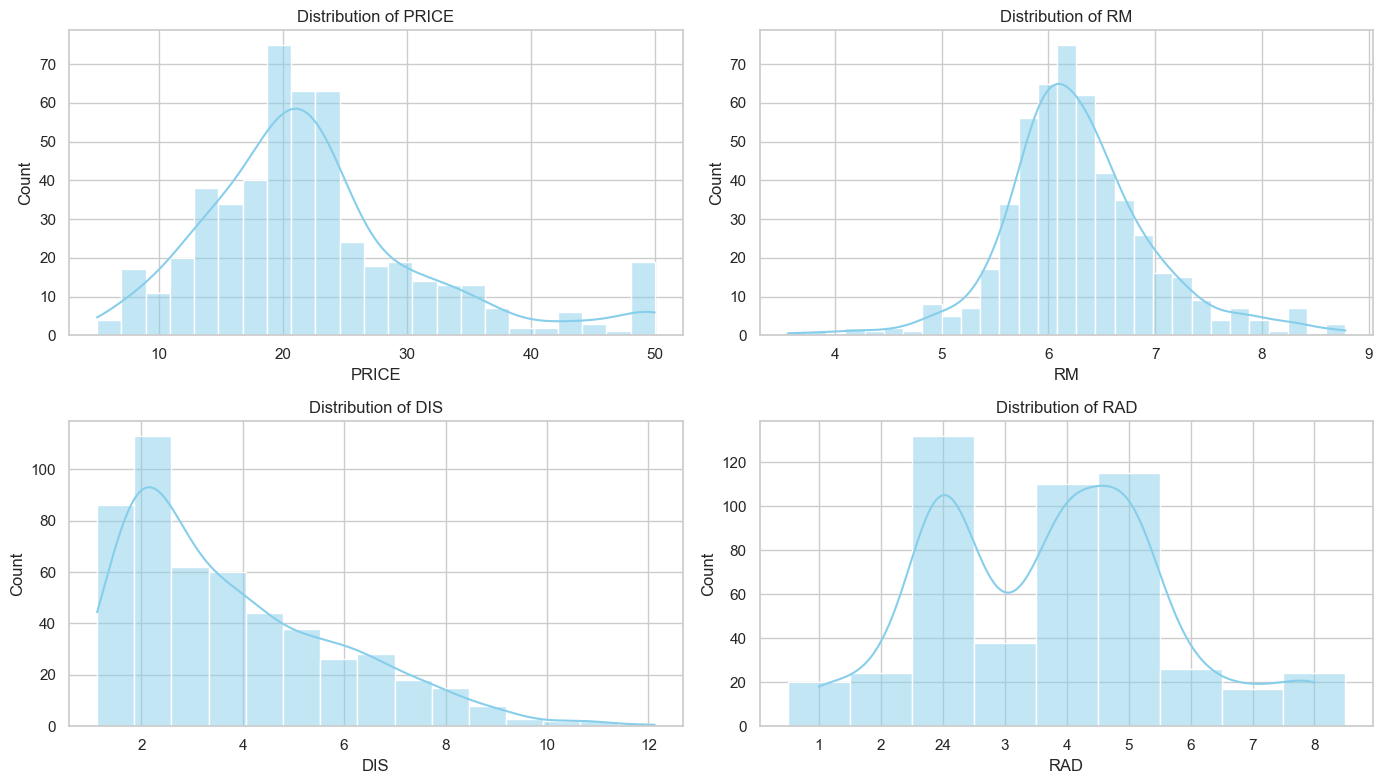

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


boston = fetch_openml(name="boston", version=1, as_frame=True)
data = boston.frame
data.rename(columns={"MEDV": "PRICE"}, inplace=True)  # 目標欄位改名為 PRICE


sns.set(style="whitegrid")


features = ['PRICE', 'RM', 'DIS', 'RAD']


fig, axes = plt.subplots(2, 2, figsize=(14, 8))  # 2x2 網格
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


#### Distance to Employment - Length of Commute 🚗

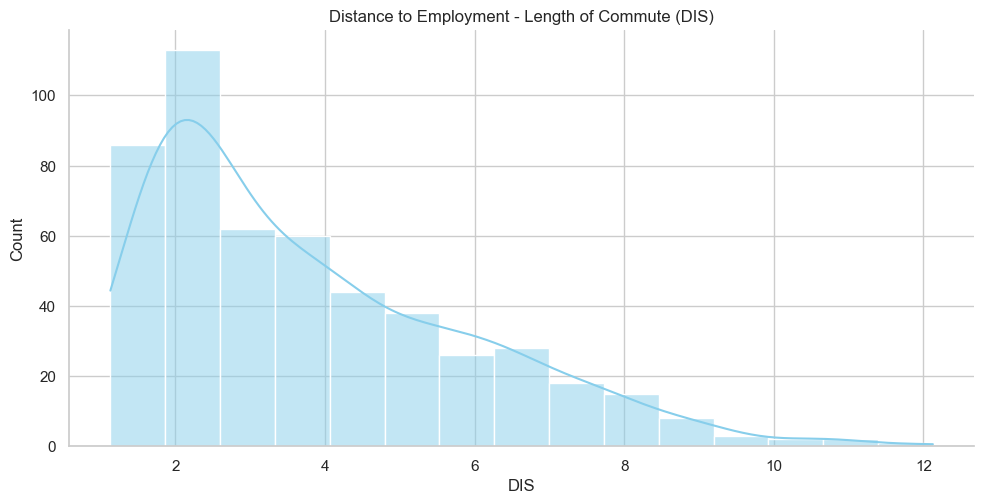

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

sns.displot(data['DIS'], kde=True, aspect=2, color="skyblue")
plt.title("Distance to Employment - Length of Commute (DIS)")
plt.xlabel("DIS")
plt.ylabel("Count")
plt.show()



#### Number of Rooms

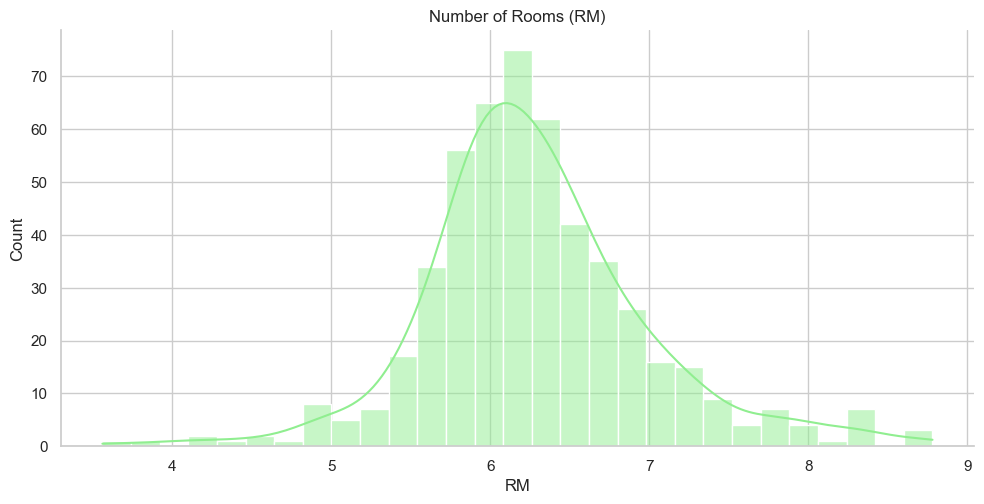

In [10]:
# RM: 房間數
sns.displot(data['RM'], kde=True, aspect=2, color="lightgreen")
plt.title("Number of Rooms (RM)")
plt.xlabel("RM")
plt.ylabel("Count")
plt.show()


#### Access to Highways 🛣

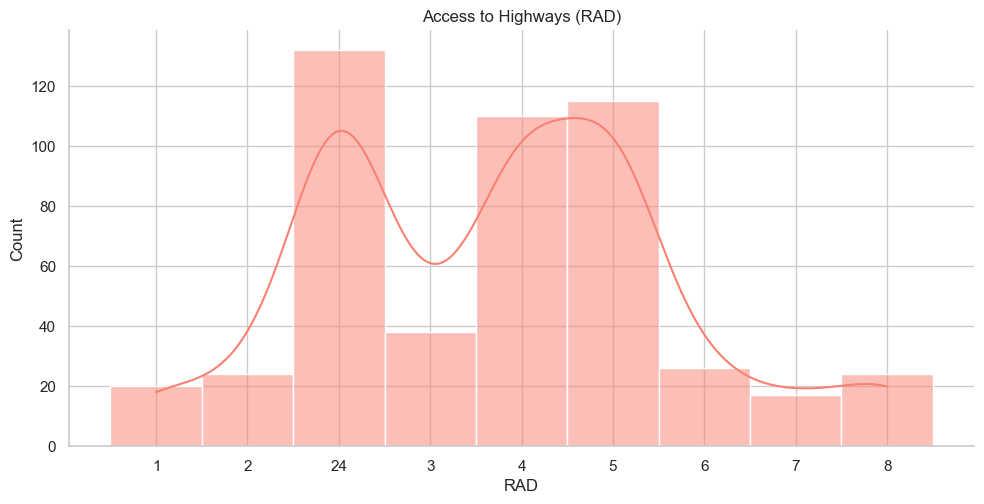

In [11]:
# RAD: 高速公路可達性
sns.displot(data['RAD'], kde=True, aspect=2, color="salmon")
plt.title("Access to Highways (RAD)")
plt.xlabel("RAD")
plt.ylabel("Count")
plt.show()


In [12]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'browser'

if pd.api.types.is_categorical_dtype(data['CHAS']):
    data['CHAS'] = data['CHAS'].astype(str)

data['CHAS_num'] = pd.to_numeric(data['CHAS'], errors='coerce')

data['CHAS_binary'] = (data['CHAS_num'] > 0.5).astype(int)
data['CHAS_label'] = data['CHAS_binary'].map({0: 'No', 1: 'Yes'})

chas_counts = data['CHAS_label'].value_counts().reset_index()
chas_counts.columns = ['Property Located Next to the River?', 'Number of Homes']

fig = px.bar(
    chas_counts,
    x='Property Located Next to the River?',
    y='Number of Homes',
    color='Property Located Next to the River?',
    text='Number of Homes',
    title='Next to Charles River?'
)
fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)
fig.show()


C:\Users\Louis\AppData\Local\Temp\ipykernel_28128\3576571969.py:7: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



Relationships in the Data

Numeric columns: Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'PRICE', 'CHAS_num', 'CHAS_binary'],
      dtype='object')


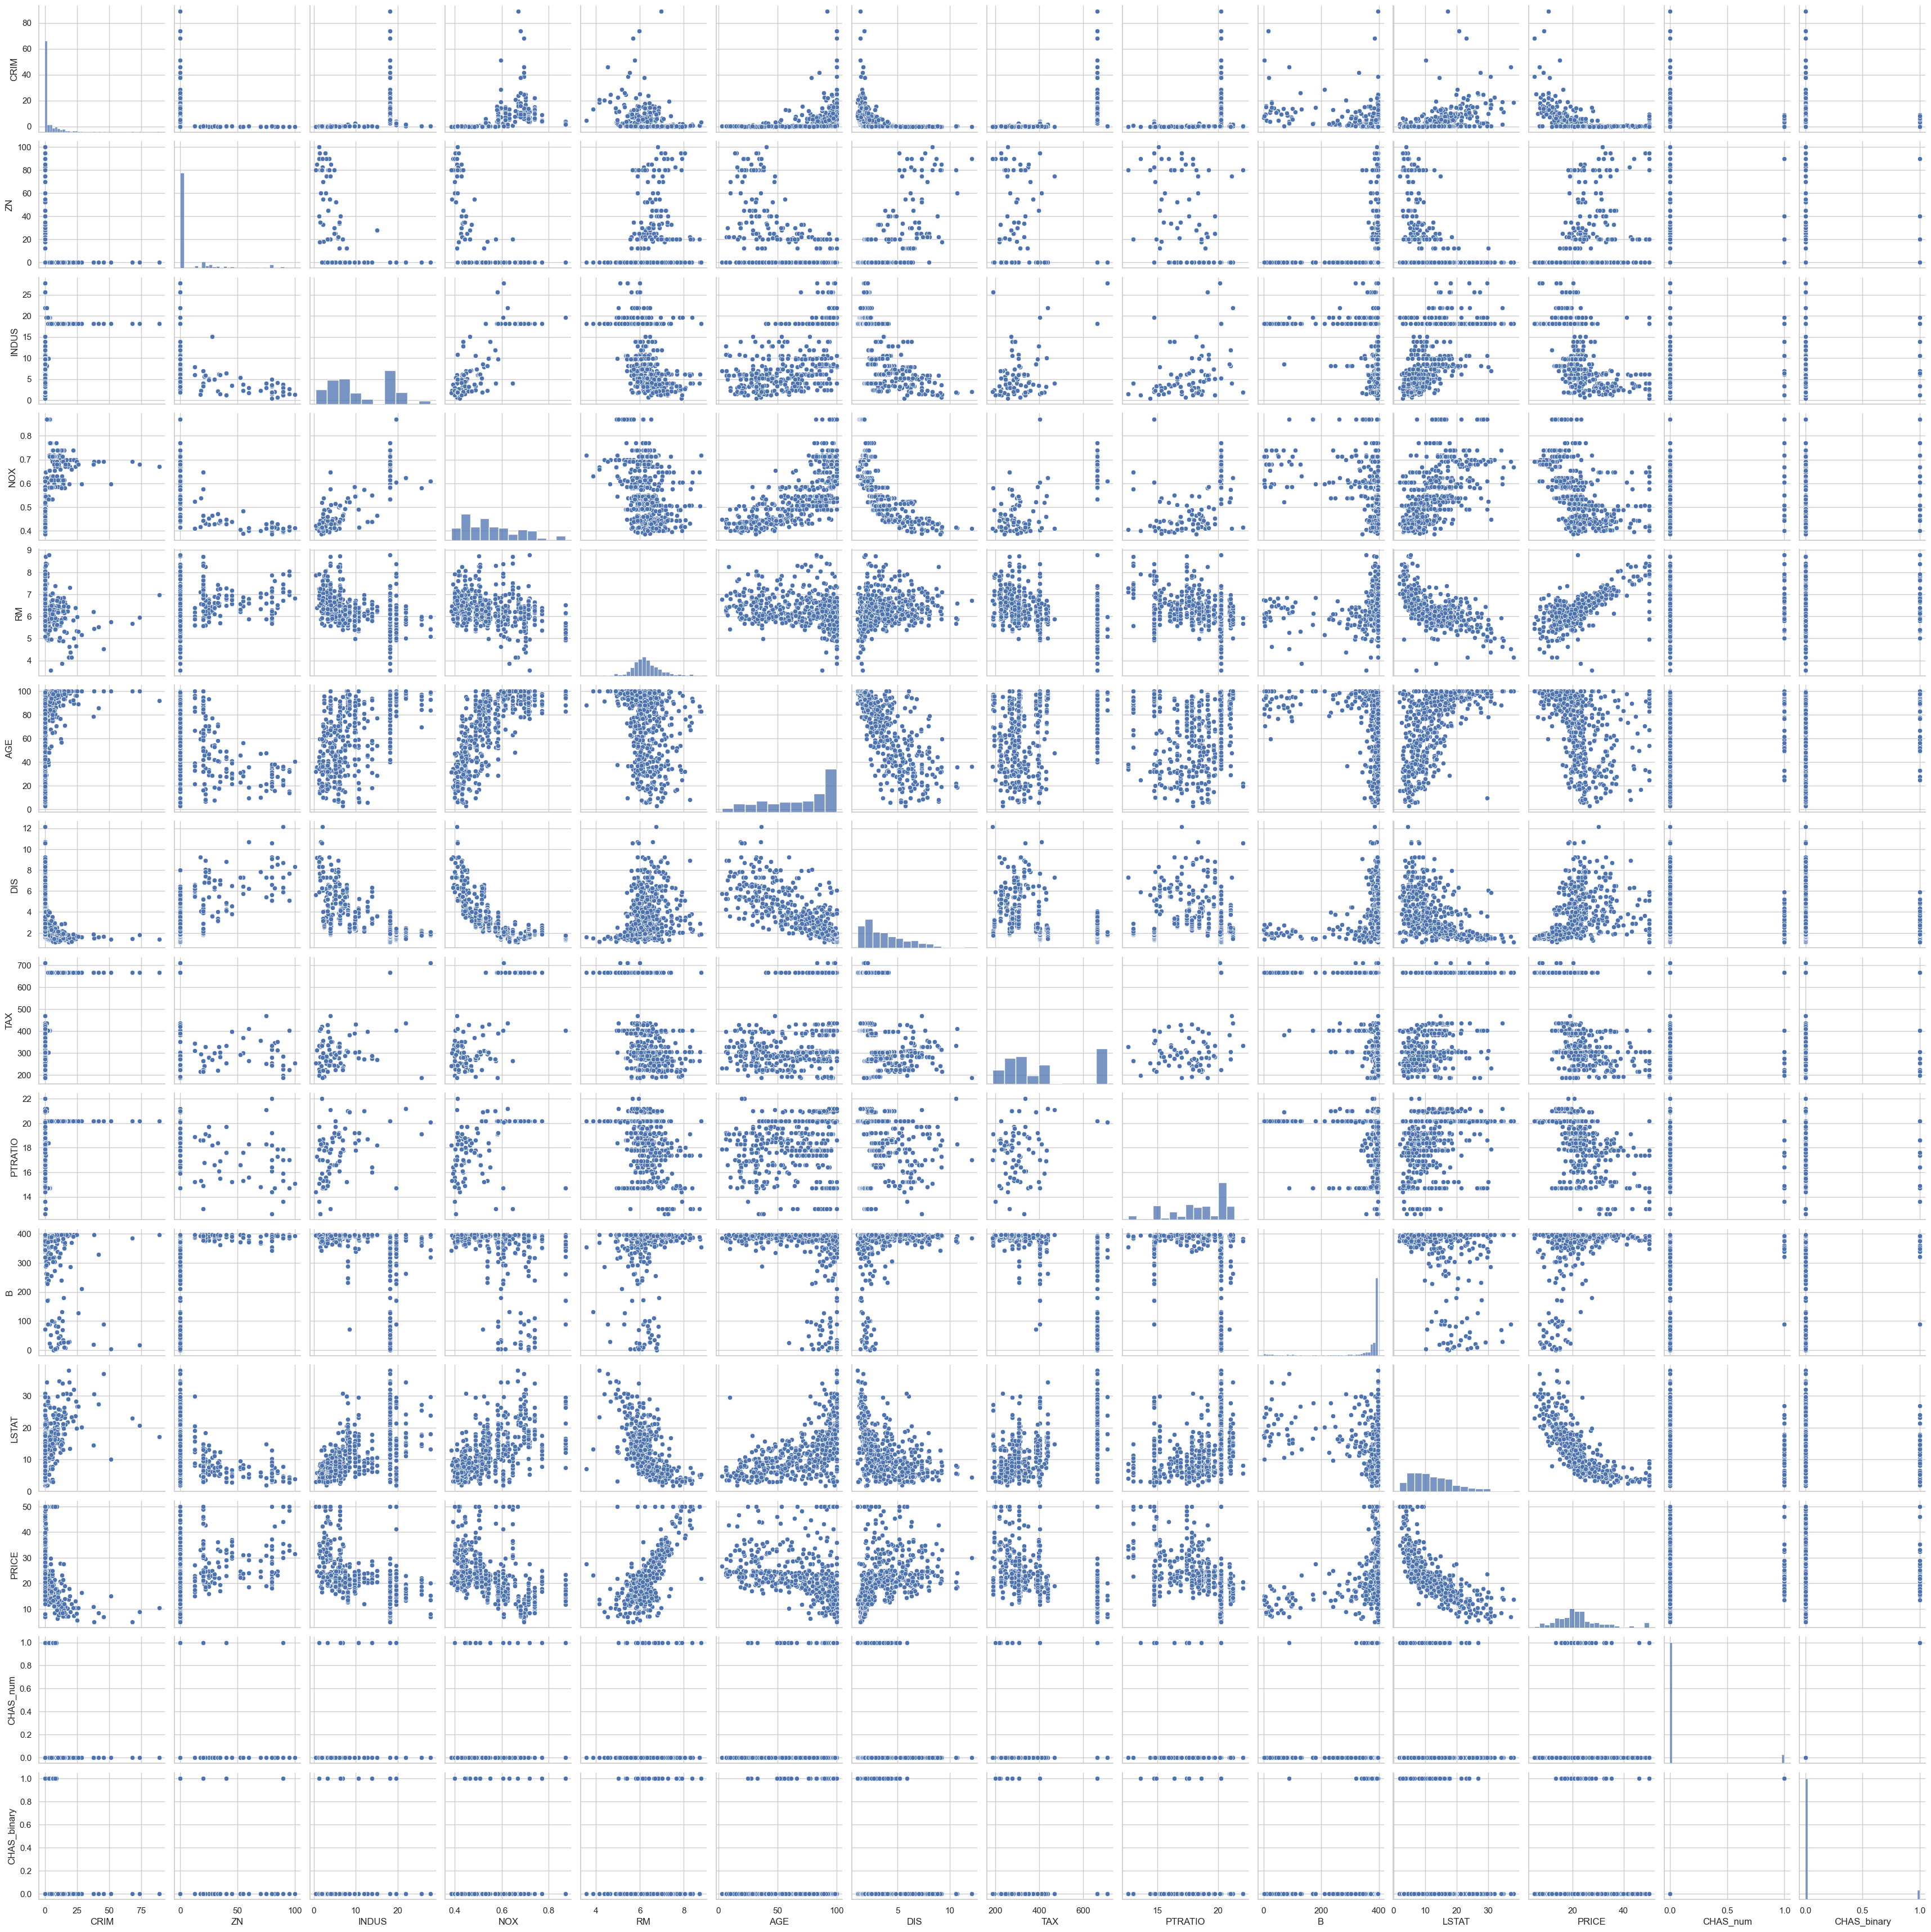

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假設 data 是你前面讀入的 DataFrame
# 如果你的 DataFrame 名稱不是 data，請改成正確名稱

# 先確認數值型欄位
numeric_cols = data.select_dtypes(include=['number']).columns
print("Numeric columns:", numeric_cols)

# 只挑數值型欄位繪製 pairplot
sns.pairplot(data[numeric_cols])
plt.show()


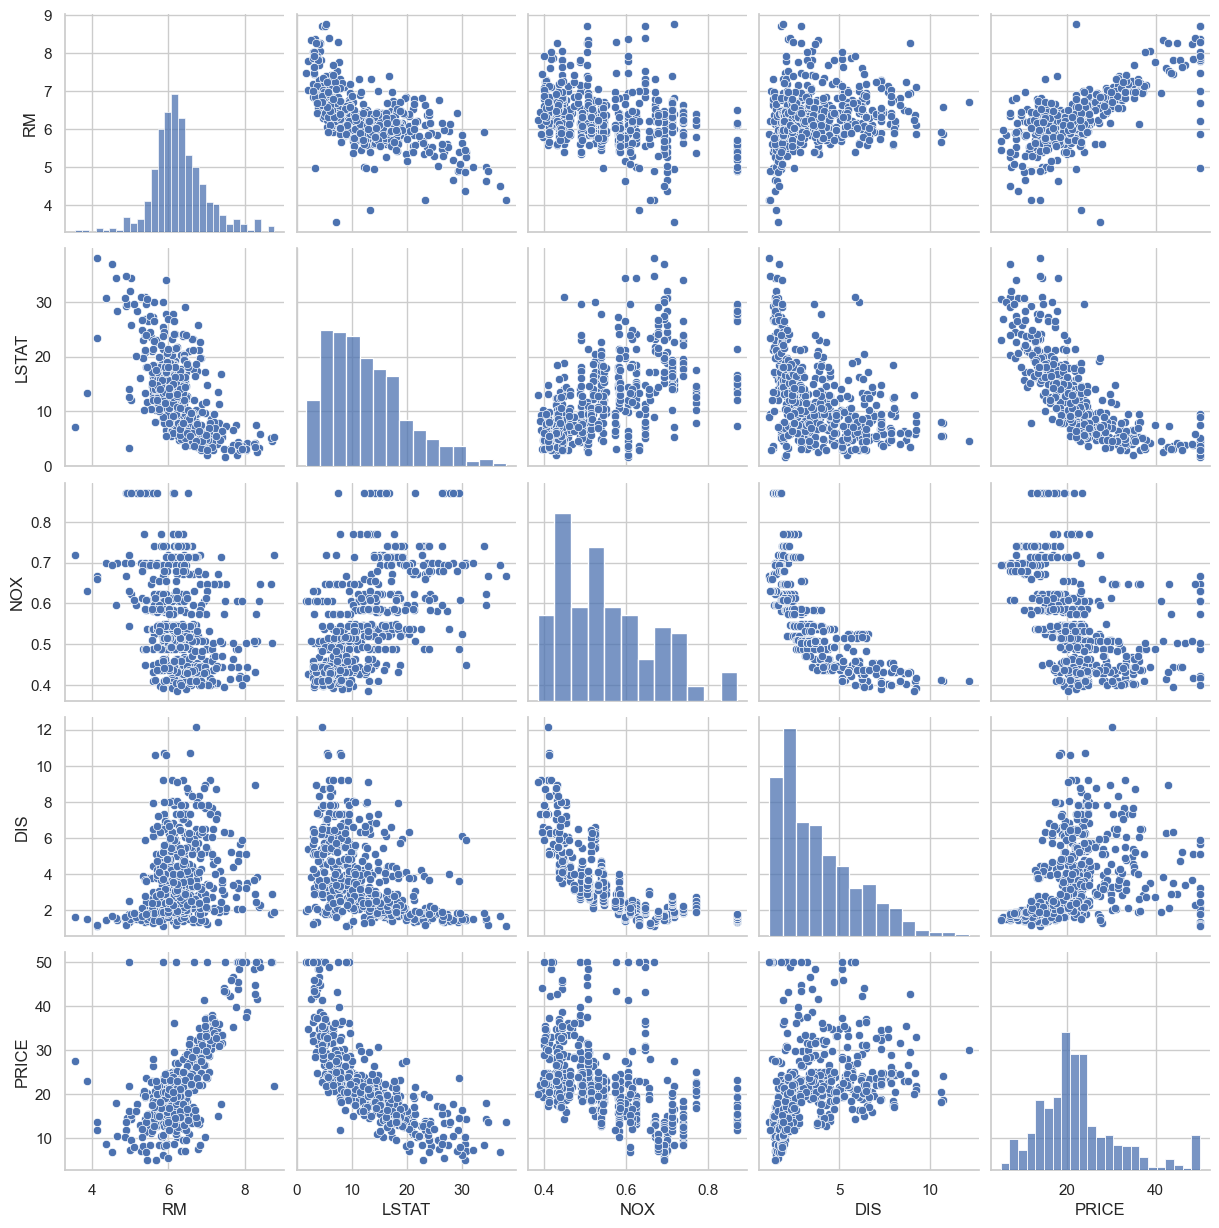

In [14]:
sns.pairplot(data[['RM', 'LSTAT', 'NOX', 'DIS', 'PRICE']])
plt.show()


#### Distance from Employment vs. Pollution



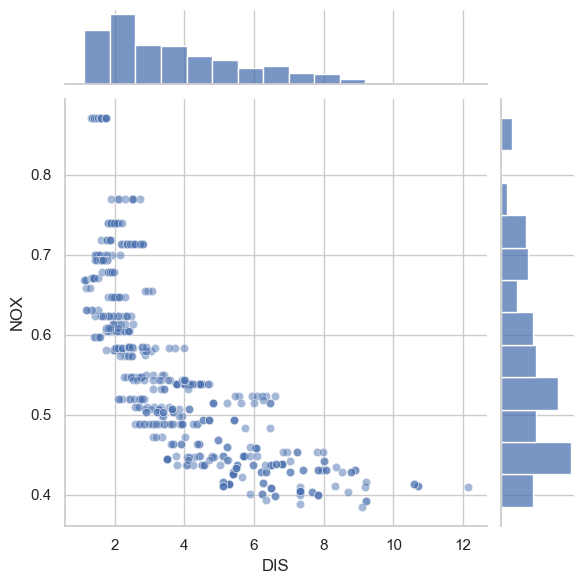

In [15]:
sns.jointplot(
    data=data,
    x="DIS", 
    y="NOX", 
    kind="scatter", 
    joint_kws={"alpha": 0.5}
)
plt.show()

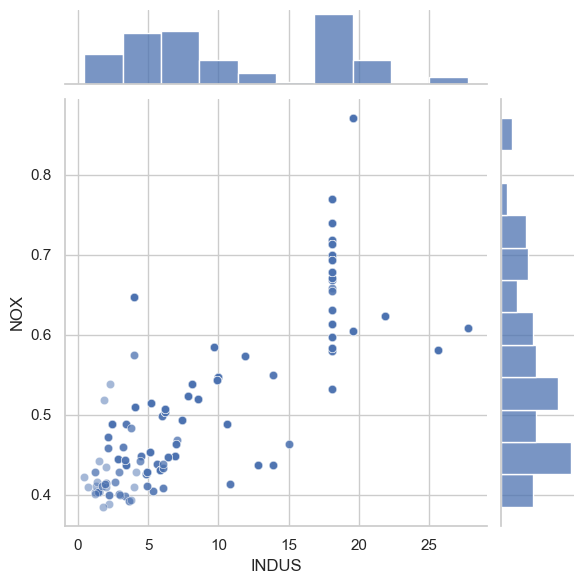

In [16]:
sns.jointplot(
    data=data,
    x="INDUS", 
    y="NOX", 
    kind="scatter", 
    joint_kws={"alpha": 0.5}
)

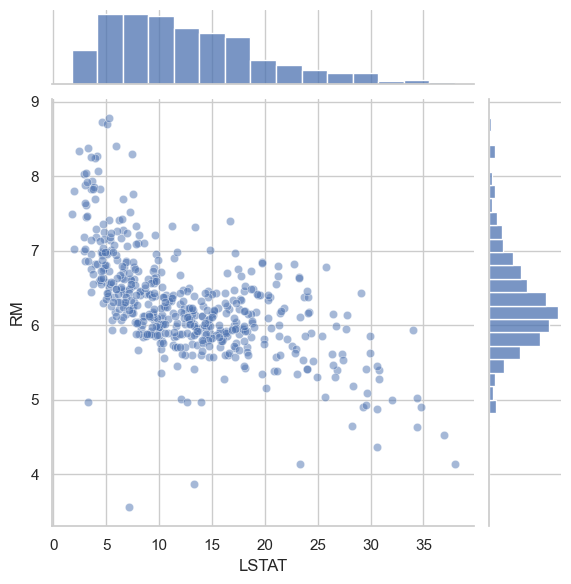

In [17]:
sns.jointplot(
    data=data,
    x="LSTAT", 
    y="RM", 
    kind="scatter", 
    joint_kws={"alpha": 0.5}
)
plt.show()

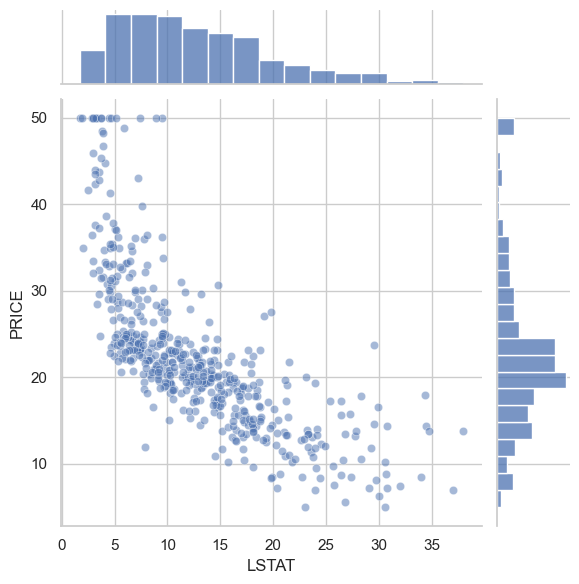

In [18]:
sns.jointplot(
    data=data,
    x="LSTAT", 
    y="PRICE", 
    kind="scatter", 
    joint_kws={"alpha": 0.5}
)
plt.show()

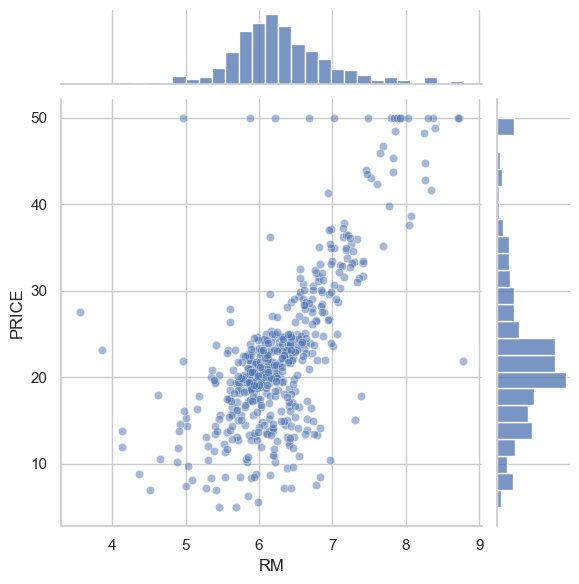

In [19]:
sns.jointplot(
    data=data,
    x="RM", 
    y="PRICE", 
    kind="scatter", 
    joint_kws={"alpha": 0.5}
)
plt.show()


# Split Training & Test Dataset




In [20]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["PRICE"])

y = data["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       
    random_state=10      
)

print("訓練集大小:", X_train.shape, y_train.shape)
print("測試集大小:", X_test.shape, y_test.shape)

訓練集大小: (404, 16) (404,)
測試集大小: (102, 16) (102,)


In [21]:
X_encoded = pd.get_dummies(X, drop_first=True)
print(X_encoded.dtypes)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_encoded, y)

r2_train = model.score(X_encoded, y)
print("訓練集 R²:", r2_train)


CRIM              float64
ZN                float64
INDUS             float64
NOX               float64
RM                float64
AGE               float64
DIS               float64
TAX               float64
PTRATIO           float64
B                 float64
LSTAT             float64
CHAS_num            int64
CHAS_binary         int64
CHAS_1               bool
RAD_2                bool
RAD_24               bool
RAD_3                bool
RAD_4                bool
RAD_5                bool
RAD_6                bool
RAD_7                bool
RAD_8                bool
CHAS_label_Yes       bool
dtype: object
訓練集 R²: 0.7498672428773164


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd


X = data.drop(columns=["PRICE"])
y = data["PRICE"]


X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=10
)


model = LinearRegression()
model.fit(X_train, y_train)


r2_train = model.score(X_train, y_train)
print("訓練集 R²:", r2_train)


訓練集 R²: 0.762399805231752


In [23]:
import pandas as pd

# 1. 取得特徵名稱與係數
coeff_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
})

# 2. 按絕對值排序，更容易看出影響力
coeff_df["Abs_Coefficient"] = coeff_df["Coefficient"].abs()
coeff_df = coeff_df.sort_values(by="Abs_Coefficient", ascending=False)

print("截距 (intercept):", model.intercept_)
print(coeff_df)


截距 (intercept): 36.859387654764525
           Feature  Coefficient  Abs_Coefficient
3              NOX       -15.76            15.76
15          RAD_24         8.20             8.20
20           RAD_7         5.62             5.62
16           RAD_3         5.57             5.57
21           RAD_8         5.36             5.36
17           RAD_4         3.16             3.16
18           RAD_5         2.93             2.93
4               RM         2.85             2.85
14           RAD_2         2.46             2.46
19           RAD_6         1.90             1.90
6              DIS        -1.58             1.58
8          PTRATIO        -0.91             0.91
10           LSTAT        -0.59             0.59
22  CHAS_label_Yes         0.47             0.47
11        CHAS_num         0.47             0.47
12     CHAS_binary         0.47             0.47
13          CHAS_1         0.47             0.47
0             CRIM        -0.13             0.13
1               ZN         0.07   

In [24]:
import matplotlib.pyplot as plt

y_train_pred = model.predict(X_train)


residuals = y_train - y_train_pred


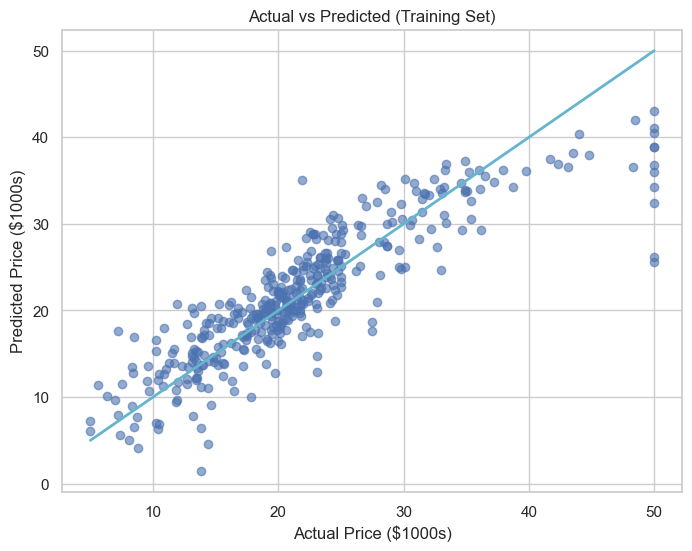

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'c', lw=2)  
plt.xlabel("Actual Price ($1000s)")
plt.ylabel("Predicted Price ($1000s)")
plt.title("Actual vs Predicted (Training Set)")
plt.show()


In [26]:
import seaborn as sns
import numpy as np
from scipy.stats import skew

residual_mean = np.mean(residuals)
residual_skew = skew(residuals)

print("Residual Mean:", residual_mean)
print("Residual Skewness:", residual_skew)


Residual Mean: -6.9647258257673185e-15
Residual Skewness: 1.491164887163935


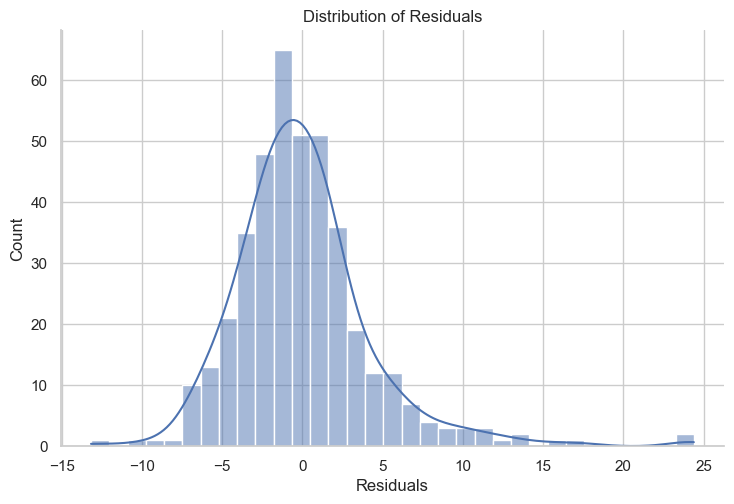

In [27]:
sns.displot(residuals, kde=True, height=5, aspect=1.5)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()


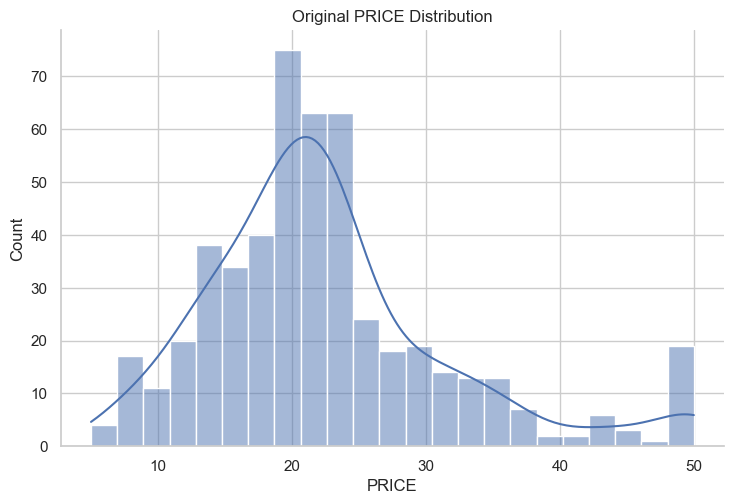

Original PRICE Skewness: 1.1080984082549072


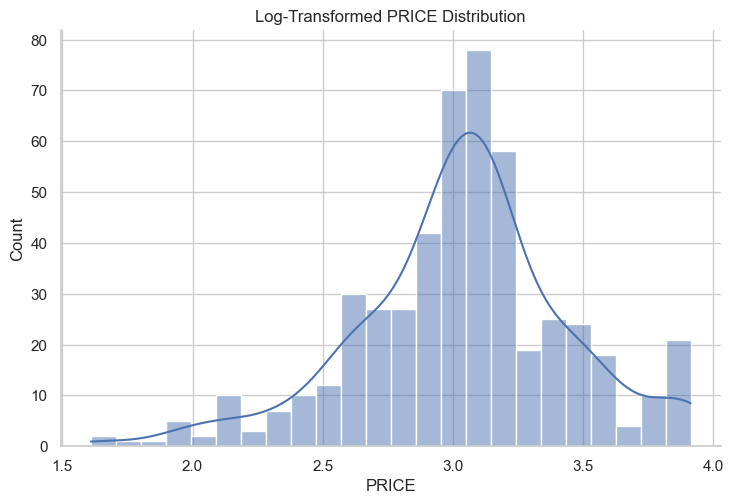

Log PRICE Skewness: -0.33032129530987864


In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data['PRICE'], kde=True, height=5, aspect=1.5)
plt.title("Original PRICE Distribution")
plt.show()

orig_skew = data['PRICE'].skew()
print("Original PRICE Skewness:", orig_skew)

log_price = np.log(data['PRICE'])


sns.displot(log_price, kde=True, height=5, aspect=1.5)
plt.title("Log-Transformed PRICE Distribution")
plt.show()

log_skew = log_price.skew()
print("Log PRICE Skewness:", log_skew)


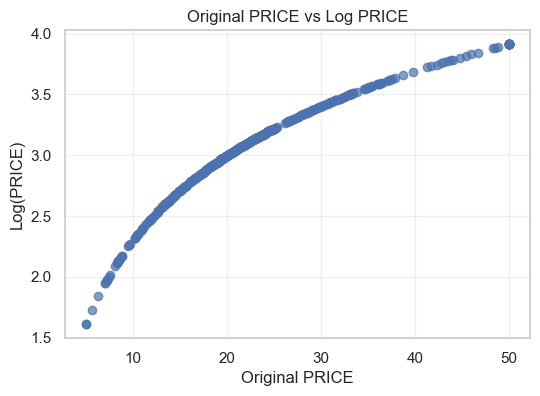

In [29]:
import matplotlib.pyplot as plt


price = data['PRICE']

log_price = np.log(price)

plt.figure(figsize=(6,4))
plt.scatter(price, log_price, alpha=0.7)
plt.xlabel("Original PRICE")
plt.ylabel("Log(PRICE)")
plt.title("Original PRICE vs Log PRICE")
plt.grid(True, alpha=0.3)
plt.show()


In [30]:
import pandas as pd

X_num = pd.get_dummies(X, drop_first=True)

print(X_num.dtypes)  


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y_log = np.log(y)

X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_num, y_log, test_size=0.2, random_state=10
)

model_log = LinearRegression()
model_log.fit(X_train, y_train_log)

print("訓練集 R² (log target):", model_log.score(X_train, y_train_log))


CRIM              float64
ZN                float64
INDUS             float64
NOX               float64
RM                float64
AGE               float64
DIS               float64
TAX               float64
PTRATIO           float64
B                 float64
LSTAT             float64
CHAS_num            int64
CHAS_binary         int64
CHAS_1               bool
RAD_2                bool
RAD_24               bool
RAD_3                bool
RAD_4                bool
RAD_5                bool
RAD_6                bool
RAD_7                bool
RAD_8                bool
CHAS_label_Yes       bool
dtype: object
訓練集 R² (log target): 0.79949615307646


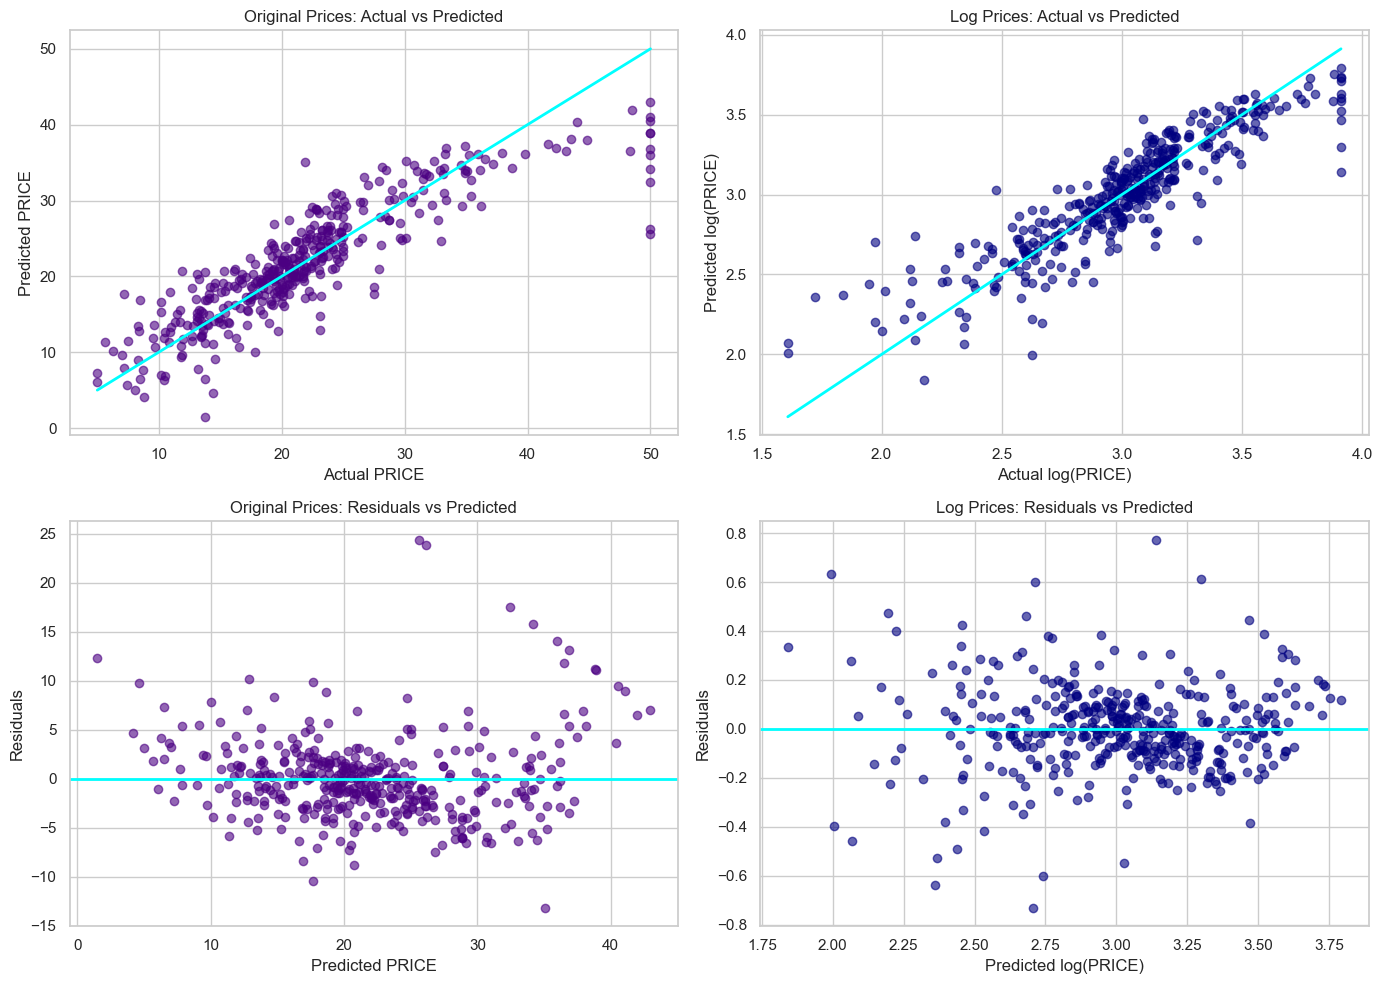

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


y_train_pred = model.predict(X_train)
y_train_log_pred = model_log.predict(X_train)


residuals = y_train - y_train_pred
residuals_log = y_train_log - y_train_log_pred

fig, axes = plt.subplots(2, 2, figsize=(14, 10))


axes[0, 0].scatter(y_train, y_train_pred, color='indigo', alpha=0.6)
axes[0, 0].plot([y_train.min(), y_train.max()],
                [y_train.min(), y_train.max()],
                color='cyan', linewidth=2)
axes[0, 0].set_xlabel('Actual PRICE')
axes[0, 0].set_ylabel('Predicted PRICE')
axes[0, 0].set_title('Original Prices: Actual vs Predicted')


axes[1, 0].scatter(y_train_pred, residuals, color='indigo', alpha=0.6)
axes[1, 0].axhline(0, color='cyan', linewidth=2)
axes[1, 0].set_xlabel('Predicted PRICE')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Original Prices: Residuals vs Predicted')


axes[0, 1].scatter(y_train_log, y_train_log_pred, color='navy', alpha=0.6)
axes[0, 1].plot([y_train_log.min(), y_train_log.max()],
                [y_train_log.min(), y_train_log.max()],
                color='cyan', linewidth=2)
axes[0, 1].set_xlabel('Actual log(PRICE)')
axes[0, 1].set_ylabel('Predicted log(PRICE)')
axes[0, 1].set_title('Log Prices: Actual vs Predicted')


axes[1, 1].scatter(y_train_log_pred, residuals_log, color='navy', alpha=0.6)
axes[1, 1].axhline(0, color='cyan', linewidth=2)
axes[1, 1].set_xlabel('Predicted log(PRICE)')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Log Prices: Residuals vs Predicted')

plt.tight_layout()
plt.show()


In [33]:
y_train_log_pred = model_log.predict(X_train)
residuals_log = y_train_log - y_train_log_pred

import numpy as np
from scipy.stats import skew

mean_log_residuals = np.mean(residuals_log)
skew_log_residuals = skew(residuals_log)

print("Residual Mean (log prices):", mean_log_residuals)
print("Residual Skewness (log prices):", skew_log_residuals)

Residual Mean (log prices): 3.5175382958420803e-16
Residual Skewness (log prices): 0.10888350772622077


In [34]:
from sklearn.metrics import r2_score

y_test_pred = model.predict(X_test)
r2_test_original = r2_score(y_test, y_test_pred)

y_test_log_pred = model_log.predict(X_test)
r2_test_log = r2_score(y_test_log, y_test_log_pred)

print("Test R² (original prices):", r2_test_original)
print("Test R² (log prices):", r2_test_log)


Test R² (original prices): 0.667706482839066
Test R² (log prices): 0.7413714370978856


In [ ]:
import pandas as pd
import numpy as np

features = data.drop(['PRICE'], axis=1)

features_numeric = features.apply(pd.to_numeric, errors='coerce')

average_vals = features_numeric.mean().values

property_stats = pd.DataFrame(
    data=average_vals.reshape(1, len(features_numeric.columns)),
    columns=features_numeric.columns
)

print(property_stats)


   CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  3.61 11.36  11.14  0.07 0.55 6.28 68.57 3.80 9.55 408.24    18.46 356.67   

   LSTAT  CHAS_num  CHAS_binary  CHAS_label  
0  12.65      0.07         0.07         NaN  


In [ ]:
import numpy as np
import pandas as pd


feature_names = model_log.feature_names_in_


avg_features = pd.DataFrame(X, columns=feature_names).mean()


avg_features = avg_features.fillna(0).values.reshape(1, -1)

print("Model expects features:", model_log.n_features_in_)
print("Avg features shape:", avg_features.shape)


log_price_pred = model_log.predict(avg_features)
print("Predicted log price:", log_price_pred[0])


price_pred = np.exp(log_price_pred)
print("Predicted price ($):", price_pred[0])


Model expects features: 23
Avg features shape: (1, 23)
Predicted log price: 2.8115733275668884
Predicted price ($): 16.636071629550216


C:\Users\Louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
# 房屋特徵
next_to_river = True                   # 是否臨河
nr_rooms = 8                           # 房間數
students_per_classroom = 20            # 每班學生數
distance_to_town = 5                   # 距離市中心
pollution = data.NOX.quantile(q=0.75)  # 高污染
amount_of_poverty = data.LSTAT.quantile(q=0.25)  # 低貧困


In [ ]:
import numpy as np
import pandas as pd

X_encoded = pd.get_dummies(X) 
feature_names = model_log.feature_names_in_

# 2️⃣ 建立平均特徵 DataFrame
avg_features = pd.DataFrame([X_encoded.mean()], columns=X_encoded.columns)

for col in feature_names:
    if col not in avg_features.columns:
        avg_features[col] = 0

avg_features = avg_features[feature_names]


avg_features["CHAS_1"] = 1 if next_to_river else 0        #
avg_features["RM"] = nr_rooms                             #
avg_features["PTRATIO"] = students_per_classroom          # 
avg_features["DIS"] = distance_to_town                    # 
avg_features["NOX"] = data.NOX.quantile(q=0.75)           # 
avg_features["LSTAT"] = data.LSTAT.quantile(q=0.25)       # 


log_price_pred = model_log.predict(avg_features)[0]
print("Predicted log price:", log_price_pred)


price_pred = np.exp(log_price_pred)
print("Predicted price ($):", price_pred)


Predicted log price: 3.181027518756123
Predicted price ($): 24.07147474093069


In [38]:
def predict_custom_house(next_to_river, nr_rooms, students_per_classroom, 
                         distance_to_town, pollution_level, poverty_level):
    # 建立一個輸入特徵 DataFrame
    input_data = pd.DataFrame([{
        'next_to_river': 1 if next_to_river else 0,
        'nr_rooms': nr_rooms,
        'students_per_classroom': students_per_classroom,
        'distance_to_town': distance_to_town,
        'pollution_level': 1 if pollution_level == 'high' else 0,
        'poverty_level': 1 if poverty_level == 'high' else 0
    }])

    # 使用你訓練好的模型預測
    prediction = model.predict(input_data)[0]
    return prediction


In [ ]:
import os
import joblib

os.makedirs("../models", exist_ok=True)


joblib.dump(model, "../models/model.pkl")


feature_names = X_train.columns.tolist()
joblib.dump(feature_names, "../models/feature_names.pkl")

print("✅ 模型與特徵名稱已經成功保存！")


✅ 模型與特徵名稱已經成功保存！


In [ ]:
import numpy as np
import pandas as pd
import joblib


model = joblib.load("../models/model.pkl")
feature_names = joblib.load("../models/feature_names.pkl")

def predict_custom_house(next_to_river, nr_rooms, students_per_classroom,
                         distance_to_town, pollution_level, poverty_level):

    input_data = pd.DataFrame(np.zeros((1, len(feature_names))), columns=feature_names)


    if 'nr_rooms' in input_data.columns:
        input_data['nr_rooms'] = nr_rooms
    if 'students_per_classroom' in input_data.columns:
        input_data['students_per_classroom'] = students_per_classroom
    if 'distance_to_town' in input_data.columns:
        input_data['distance_to_town'] = distance_to_town

    if 'next_to_river' in input_data.columns:
        input_data['next_to_river'] = 1 if next_to_river else 0

    for level in ['high', 'low']:
        col = f'pollution_level_{level}'
        if col in input_data.columns:
            input_data[col] = 1 if pollution_level == level else 0

    for level in ['high', 'low']:
        col = f'poverty_level_{level}'
        if col in input_data.columns:
            input_data[col] = 1 if poverty_level == level else 0

 
    prediction = model.predict(input_data)[0]
    return prediction


In [44]:
price = predict_custom_house(
    next_to_river=True,
    nr_rooms=8,
    students_per_classroom=20,
    distance_to_town=5,
    pollution_level='high',
    poverty_level='low'
)

print(f"預測價格: {price:.2f} 美元")


預測價格: 36.86 美元


In [46]:
import os

print(os.getcwd())  

c:\Users\Louis\Downloads\Multivariable+Regression+(Start) (1)


In [47]:
import glob

print(glob.glob("*.pkl"))

[]


In [49]:
import joblib
import os


os.makedirs("models", exist_ok=True)


joblib.dump(model, "models/model.pkl")
joblib.dump(feature_names, "models/feature_names.pkl")


['models/feature_names.pkl']